# Algoritmo Incremental orientado a objeto

In [5]:
import math
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

EPSILON = 1e-9
ROT_ANGLE = 1e-4
PERTURB = 1e-7
def orient(a, b, c):
    return (b.x - a.x) * (c.y - a.y) - (b.y - a.y) * (c.x - a.x)

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def rotate(self, angle):
        cos_a = math.cos(angle)
        sin_a = math.sin(angle)
        return Point(self.x * cos_a - self.y * sin_a,
                     self.x * sin_a + self.y * cos_a)

    def perturbed(self):
        return Point(self.x + random.uniform(-PERTURB, PERTURB),
                     self.y + random.uniform(-PERTURB, PERTURB))

    def __repr__(self):
        return f"({self.x:.6f},{self.y:.6f})"

class IncrementalConvexHull:
    def __init__(self, points, animated=False):
        self.points = [Point(*pt) if not isinstance(pt, Point) else pt for pt in points]
        self.hull = []
        self.frames = []
        self.animated = animated

    def preprocess(self):
        HAS_ROTATED = 0
        xs = [p.x for p in self.points]
        if len(xs) != len(set(xs)):
            self.points = [p.rotate(ROT_ANGLE) for p in self.points]
            HAS_ROTATED = 1
        self.points.sort(key=lambda p: (p.x, p.y))
        if HAS_ROTATED == 1:
            self.points = [p.rotate(-ROT_ANGLE) for p in self.points]

    def init_hull(self):
        p0, p1, p2 = self.points[0], self.points[1], self.points[2]
        if abs(orient(p0, p1, p2)) < EPSILON:
            p2 = p2.perturbed()
        if orient(p0, p1, p2) > 0:
            p1, p2 = p2, p1
        self.hull = [p0, p1, p2]
        if self.animated:
            self.save_frame(None)

    def is_inside(self, p):
        n = len(self.hull)
        for i in range(n):
            a = self.hull[i]
            b = self.hull[(i + 1) % n]
            if orient(a, b, p) < -EPSILON:
                return False
        return True

    def add_point(self, p):
        # Verifique se o ponto está dentro do hull
        if self.is_inside(p):
            if self.animated:
                self.save_frame(p)
            return

        n = len(self.hull)
        visible = [i for i in range(n) if orient(self.hull[i], self.hull[(i + 1) % n], p) > EPSILON]
        
        
        if len(visible) > 1:
            for idx in visible[::-1][:-1]:
                del self.hull[idx]

        self.hull.insert(visible[0]+1, p)  # Adiciona o novo ponto

        if self.animated:
            self.save_frame(p)


    def compute(self):
        self.preprocess()
        self.init_hull()
        for p in self.points[3:]:
            self.add_point(p)
        return self.hull

    def save_frame(self, current_point):
        frame = {
            "hull": list(self.hull),
            "points": list(self.points),
            "current": current_point
        }
        self.frames.append(frame)

    def animate(self, test_id):
        fig, ax = plt.subplots(figsize=(6, 6))

        def update(i):
            # Repetir o último frame por 3 iterações
            if i >= len(self.frames) - 3:
                i = len(self.frames) - 1  # Garantir que as últimas 3 iterações sejam o último frame

            ax.clear()
            frame = self.frames[i]
            pts = frame["points"]
            hull = frame["hull"]
            current = frame["current"]

            ax.set_title(f"Etapa {i}")
            ax.set_xlim(min(p.x for p in pts) - 1, max(p.x for p in pts) + 1)
            ax.set_ylim(min(p.y for p in pts) - 1, max(p.y for p in pts) + 1)

            # Plotando todos os pontos
            ax.scatter([p.x for p in pts], [p.y for p in pts], color='blue', label='Pontos')
            
            # Se o ponto atual estiver sendo processado, destacá-lo
            if current:
                ax.scatter(current.x, current.y, color='green', s=100, label='Novo ponto')

            # Plotando o hull
            if hull:
                hx = [p.x for p in hull] + [hull[0].x]
                hy = [p.y for p in hull] + [hull[0].y]
                ax.plot(hx, hy, color='red', label='Hull')

            # Adicionando os índices dos pontos no hull
            for idx, p in enumerate(hull):
                ax.text(p.x, p.y, str(idx), fontsize=12, ha='right', color='black', fontweight='bold')

            # Adiciona legenda e grid
            ax.legend()
            ax.grid(True)

        # Criando animação
        anim = FuncAnimation(fig, update, frames=len(self.frames) + 2, interval=800, repeat=False)
        
        # Salvando animação com nome único baseado no test_id
        anim.save(f"Simulações/convex_hull_incremental_{test_id}.mp4", writer="ffmpeg", fps=1)
        plt.close(fig)  # Fecha a figura após salvar o vídeo


# Simulações

Gerando hull para 10 pontos...
Gerando hull para 20 pontos...
Gerando hull para 30 pontos...
Gerando hull para 40 pontos...
Gerando hull para 50 pontos...
Gerando hull para 60 pontos...
Gerando hull para 70 pontos...
Gerando hull para 80 pontos...
Gerando hull para 90 pontos...


KeyboardInterrupt: 

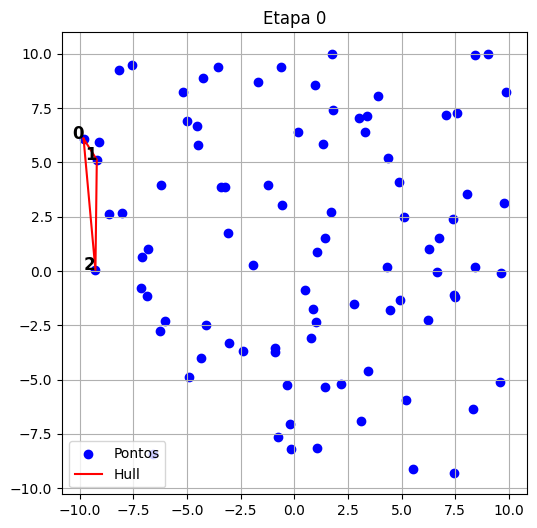

In [2]:
# Função para gerar pontos aleatórios
random.seed(42)
def generate_random_points(num_points):
    return [(random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(num_points)]

# Gerar vídeos para vários conjuntos de pontos aleatórios
for n in range(10, 101, 10):  # Gerar pontos de 10 até 100 (em incrementos de 10)
    pts = generate_random_points(n)
    print(f"Gerando hull para {n} pontos...")
    
    hull_solver = IncrementalConvexHull(pts, animated=True)
    hull_solver.compute()
    hull_solver.animate(test_id=n)  # Passa o tamanho do conjunto de pontos como test_id


# Para testar o algoritmo, mude a váriavel "pts" abaixo e rode o algoritmo. 
Se quiser uma simulação visual com o matplotlib, mude a variável "animated" para "True". Se quiser gerar pontos aleatórios, utilize a função "generate_random_points" como pode ser visto abaixo. Caso contrário, passe uma array de pontos no formato [(a,b), (c,d), (e,f), ... (y,z)]

In [3]:
random.seed(42)
def generate_random_points(num_points):
    return [(random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(num_points)]

In [4]:
# ESSAS SÃO AS VARIÁVEIS QUE VOCÊ DEVE MUDAR
pts = [(1,1), (2,2), (3,0), (4,1)]
animated = False



print(f"Gerando hull para {len(pts)} pontos...")
hull_solver = IncrementalConvexHull(pts, animated)
hull = hull_solver.compute()
print(f"Hull encontrado: {hull}")
if animated == True:
    hull_solver.animate(test_id=len(pts))
    print(f"Simulação salva em Simulações/convex_hull_incremental_{len(pts)}.mp4")
    
    

Gerando hull para 4 pontos...
Hull encontrado: [(1.000000,1.000000), (2.000000,2.000000), (4.000000,1.000000), (3.000000,0.000000)]
